> # Git

Git:分布式版本控制系统,记录文件版本的改动     

集中式版本控制系统，版本库是集中存放在中央服务器:获取最新版本，修改，再推送给中央服务器 

版本库:版本库又名仓库，英文名repository，你可以简单理解成一个目录，这个目录里面的所有文件都可以被Git管理起来，每个文件的修改、删除，Git都能跟踪，以便任何时刻都可以追踪历史，或者在将来某个时刻可以“还原”。

```
mkdir OUROBOROS:创建名为OUROBOROS的版本库
cd OUROBOROS：转入名为OUROBOROS的目录
pwd:用于显示当前目录
git init:把这个目录变成Git可以管理的仓库
```

> ## Git时光机

> ### 1.版本回退

所有的版本控制系统只能跟踪文本文件的改动,比如TXT文件,网页，所有的程序代码等等.版本控制系统可以告诉你每次的改动,比如在某行单词的删减.而图片、视频这些二进制文件,虽然也能由版本控制系统管理,但没法跟踪文件的变化,只能把二进制文件每次改动串起来,也就是只知道图片大小改变,无法知道到底改了什么

Microsoft的Word格式是二进制格式,因此,版本控制系统是没法跟踪Word文件的改动的,使用版本控制系统，就要以纯文本方式编写文件。

```
git add:把文件添加到仓库
git commit -m "reference":把文件提交到仓库
commit可以一次提交很多文件，所以可以多次add不同的文件
git status:显示仓库当前的状态
git diff:查看difference
git log:显示从最近到最远的提交日志 (git log --pretty=oneline)
HEAD表示当前版本,上一个版本是HEAD^，上上个版本是HEAD^^,往上100个版本写作HEAD~100
git reset --hard HEAD^:回退到上一个版本(git reset)
git reset --hard 1094a:回退到以1094a开头的版本(commit id 不需要写全,只需要写版本号的前几位)
git reflog:记录行使的每一次命令
```

> ### 2.工作区与暂存区

工作区(Working Directory):电脑里能看到的目录    
版本库(Repository):工作区有一个隐藏目录.git,不算做工作区,而是Git的版本库     
Git的版本库里有一个名为stage（或者叫index）的暂存区，还有Git为我们自动创建的第一个分支master,以及指向master的一个指针叫HEAD。

文件往Git版本库里添加的时候，分两步执行：    
1. 用git add把文件添加进去，实际上就是把文件修改添加到暂存区；
2. 用git commit提交更改，实际上就是把暂存区的所有内容提交到当前分支    


创建Git版本库时,Git自动为我们创建了唯一一个master分支,git commit就是往master分支上提交更改

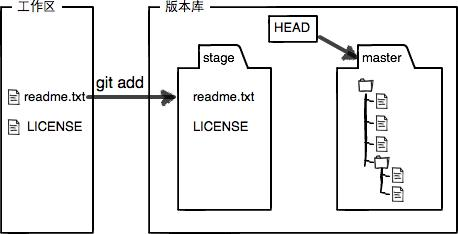

> ### 3.修改

Git跟踪并管理的是修改,而非文件    


1. readme.txt自修改后还没有被放到暂存区，现在，撤销修改就回到和版本库一模一样的状态    

    让这个文件回到最近一次git commit或git add时的状态。
```
git checkout -- <filename>:把文件在工作区的修改全部撤销,有两种情况:    
```
2. readme.txt已经添加到暂存区后，又作了修改，现在，撤销修改就回到添加到暂存区后的状态

```
git reset HEAD <file>:把暂存区的修改撤销掉(unstage),重新放回工作区(需要再用checkout才能把工作区的也撤销)   
```

> ### 3.删除文件

```
rm <file>:删除文件(删除后版本库和工作区不一致)
1. 确实要从版本库中删除该文件,用命令git rm删掉,并且git commit
2. 删错了,git checkout -- <file>
git checkout其实是用版本库里的版本替换工作区的版本
```

> ## 远程仓库

ssh密钥地址:C:\Users\lsc99\.ssh    
id_rsa:私钥     
id_rsa.pub:公钥    

```
git remote add origin git@server-name:path/repo-name.git:关联一个远程库
git push -u origin master:第一次推送master分支的所有内容
git push origin master:把本地master分支的最新修改推送至GitHub
git clone git@github.com:Ouroboros-csl/gitskills.git:从远程仓库复制

从远程仓库复制以后，需要创建新分支，提交修改后merge到原本的分支
```

> ## 分支管理

在版本回退里，你已经知道，每次提交，Git都把它们串成一条时间线，这条时间线就是一个分支。截止到目前，只有一条时间线，在Git里，这个分支叫主分支，即master分支。HEAD严格来说不是指向提交，而是指向master，master才是指向提交的，所以，HEAD指向的就是当前分支。     
一开始的时候，master分支是一条线，Git用master指向最新的提交，再用HEAD指向master，就能确定当前分支，以及当前分支的提交点：

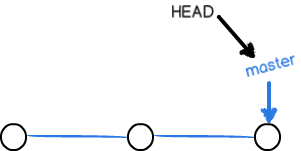

每次提交，master分支都会向前移动一步，这样，随着你不断提交，master分支的线也越来越长。    
当我们创建新的分支，例如dev时，Git新建了一个指针叫dev，指向master相同的提交，再把HEAD指向dev，就表示当前分支在dev上：

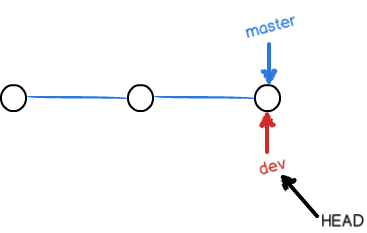

Git创建一个分支很快，因为除了增加一个dev指针，改变HEAD的指向，工作区的文件都没有任何变化     
从改变指针开始，对工作区的修改和提交就是针对dev分支了，比如新提交一次后，dev指针往前移动一步，而master指针不变：

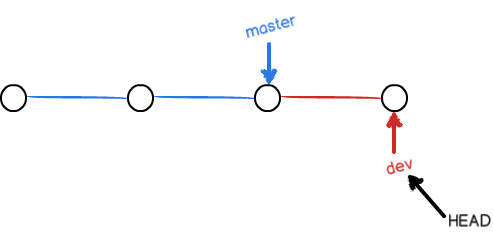

假如我们在dev上的工作完成了，就可以把dev合并到master上，把master指向dev的当前提交，就完成了合并    
Git合并分支很快：仅改变指针，工作区内容也不变    
合并完分支后，删除dev分支(把dev指针给删掉)删除后只剩下了一条master分支：

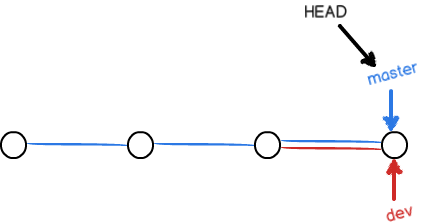

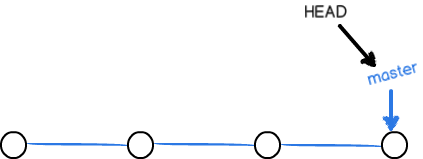

```
git checkout -b dev:创建dev分支并切换到dev分支   
git checkout命令加上-b参数表示创建并切换
相当于以下代码:
    git branch dev
    git checkout dev

git branch:查看当前分支
git checkout master:转换回master
git merge dev:dev分支的工作成果合并到master分支(git merge命令用于合并指定分支到当前分支)
    Fast-forward信息，Git告诉我们，这次合并是“快进模式”，也就是直接把master指向dev的当前提交
git branch -d dev:删除dev分支
git push origin --delete dev ：删除远程仓库分支
```

> ## 解决冲突

```
git switch -c featurel    
修改两个分支后提交，再合并分支可能会发生错误（git会首先尝试合并）    
需要手动修改以后才能提交，最后删除分支dev
git log --graph:查看分支合并图
git log:可以查看日志
```

> ## 分支管理策略

通常，合并分支时，如果可能，Git会用Fast forward模式，这种模式下，删除分支后，会丢掉分支信息     

如果强制禁用Fast forward模式，Git就会在merge时生成一个新的commit，这样，从分支历史上就可以看出分支信息。    
--no-ff方式的git merge：     
```
git merge --no-ff -m "merge with no-ff" dev
本次合并要创建一个新的commit，所以加上-m参数，把commit描述写进去
```
合并分支时，加上--no-ff参数就可以用普通模式合并，合并后的历史有分支，能看出来曾经做过合并，而fast forward合并就看不出来曾经做过合并

master应该只发布稳定版本，不稳定的工作版本保留在dev分支上

> ## BUG分支

BUG：在Git中，每个bug都可以通过一个新的临时分支来修复，修复后，合并分支，然后将临时分支删除。

目前接到一个更加紧急的bug任务需要创建一个issue-101完成，但手头还有一个dev分支**无法短时间内提交**    
Git提供了一个stash功能，可以把当前工作现场“储藏”起来，等以后恢复现场后继续工作

```
git stash
执行命令stash后再次使用git status查看工作区，是干净的
git stash list:查看储存的工作现场
Git把stash内容存在某个地方

恢复方法：
1. git stash apply:恢复后，stash内容并不删除,用git stash drop来删除；
2. git stash pop，恢复的同时删除stash内容：

可以多次stash，用以下命令载入某个储存
git stash apply stash@{0}
```

在master分支上修复了bug后，dev分支是早期从master分支分出来的，所以，这个bug其实在当前dev分支上也存在。同样的bug，要在dev上修复，我们只需要把4c805e2 fix bug 101这个提交所做的修改“复制”到dev分支。    
- 注意：只需要复制4c805e2 fix bug 101这个提交所做的修改，并不是把整个master分支merge过来。      

为了方便操作，Git专门提供了一个cherry-pick命令，让我们能复制一个特定的提交到当前分支：  
```
$ git branch
* dev
  master
$ git cherry-pick 4c805e2
[master 1d4b803] fix bug 101
 1 file changed, 1 insertion(+), 1 deletion(-)
```
Git自动给dev分支做了一次提交，注意这次提交的commit是1d4b803，它并不同于master的4c805e2，因为这两个commit只是改动相同，但是两个不同的commit

> ## Feature分支

如果要丢弃一个没有被合并过的分支，可以通过git branch -D <name>强行删除

> ## 多人协作
```
git remote：查看远程库信息
git remote -v：显示更详细的信息
```

```
多人协作的工作模式通常是这样：
首先，可以试图用git push origin <branch-name>推送自己的修改；     
如果推送失败，则因为远程分支比你的本地更新，需要先用git pull试图合并；     
如果合并有冲突，则解决冲突，并在本地提交；     
没有冲突或者解决掉冲突后，再用git push origin <branch-name>推送就能成功     
如果git pull提示no tracking information，则说明本地分支和远程分支的链接关系没有创建，用命令git branch --set-upstream-to <branch-name> origin/<branch-name>
````

> ## REBASE